In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('iris-data.csv')

In [3]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Removing all null values row
df = df.dropna(subset=['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


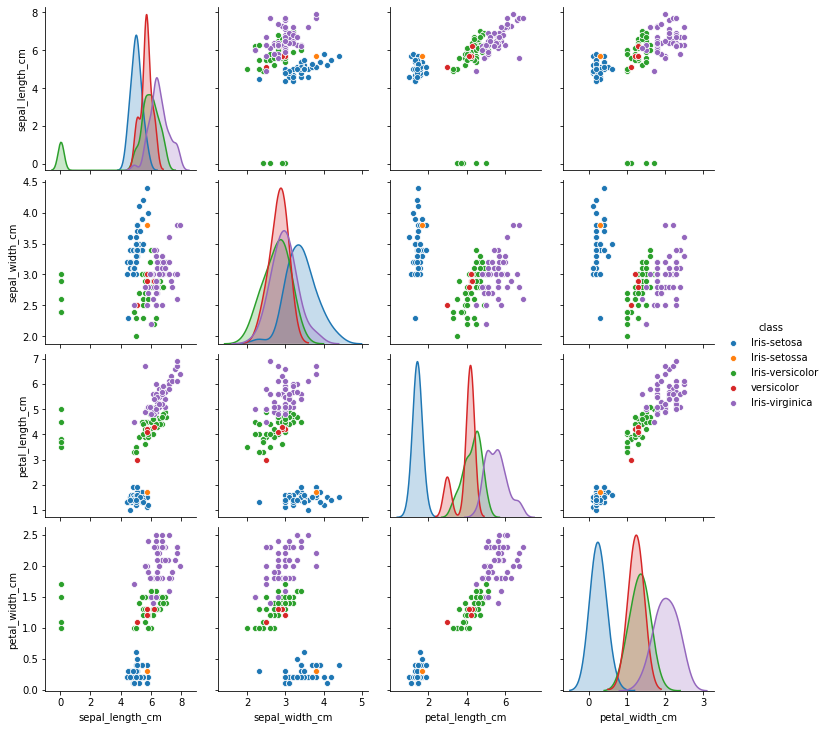

In [7]:
sns.pairplot(df, hue='class', height=2.5, diag_kws={'bw': 0.2})

In [8]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [9]:
df['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        45
Name: class, dtype: int64

In [10]:
final_df = df[df['class'] != 'Iris-virginica']

In [11]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


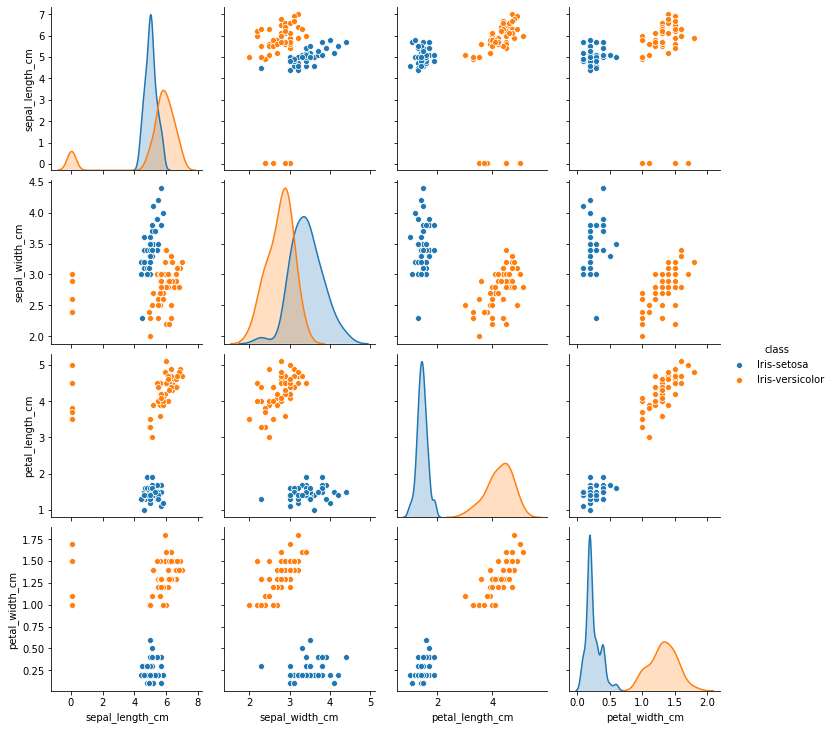

In [12]:
sns.pairplot(final_df, hue='class', size=2.5)

array([[<AxesSubplot:title={'center':'sepal_length_cm'}>]], dtype=object)

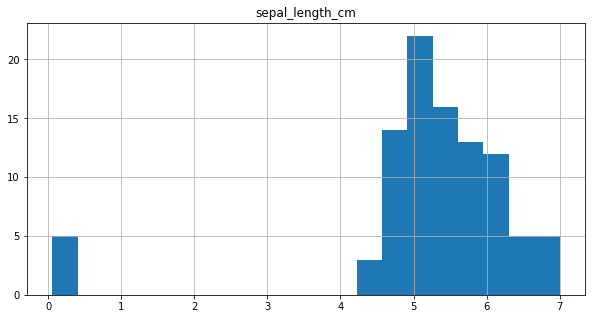

In [13]:
final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([[<AxesSubplot:title={'center':'sepal_length_cm'}>]], dtype=object)

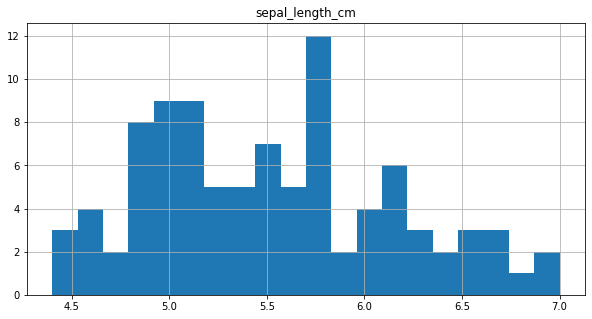

In [14]:
final_df.loc[final_df.sepal_length_cm < 1, ['sepal_length_cm']] = final_df['sepal_length_cm']*100
final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

In [15]:
final_df = final_df.drop(final_df[(final_df['class'] == "Iris-setosa") & (final_df['sepal_width_cm'] < 2.5)].index)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


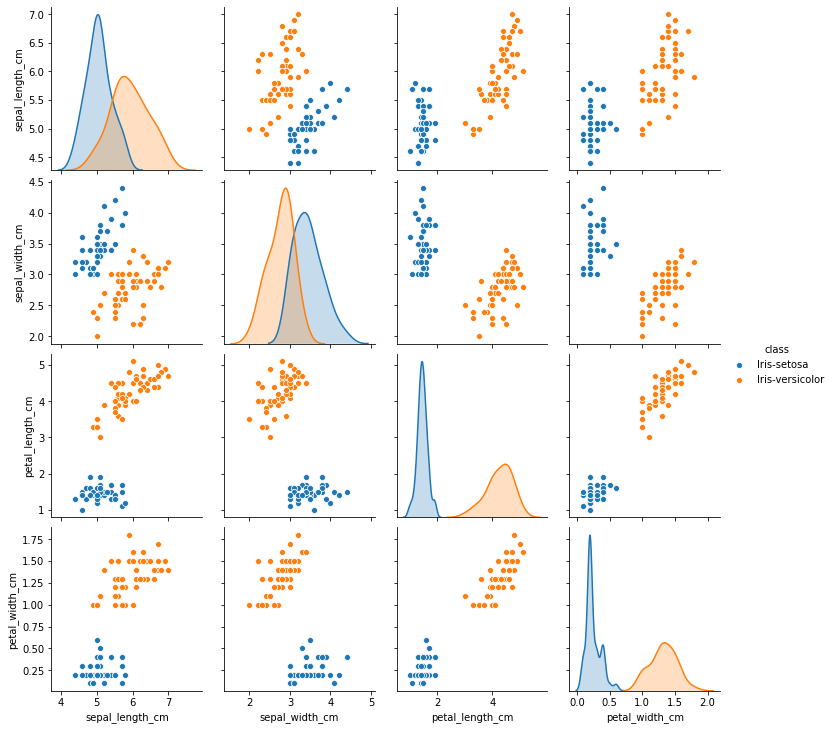

In [16]:
sns.pairplot(final_df, hue='class', size=2.5)

In [17]:
final_df['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)

In [18]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [20]:
X = final_df.drop(final_df.columns[[4]], axis=1)
y = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)
#
scaler = StandardScaler()
inp_df = scaler.fit_transform(X)
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.values
y_ts_arr = y_test.values

In [26]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (75, 4)
Output Shape (19, 4)


In [27]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [28]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [29]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [30]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [31]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [39]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent

coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.01,no_iterations=3000)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 4
Cost after 0 iteration is 0.693147
Cost after 100 iteration is 0.390489
Cost after 200 iteration is 0.264265
Cost after 300 iteration is 0.196725
Cost after 400 iteration is 0.155809
Cost after 500 iteration is 0.128697
Cost after 600 iteration is 0.109526
Cost after 700 iteration is 0.095300
Cost after 800 iteration is 0.084343
Cost after 900 iteration is 0.075655
Cost after 1000 iteration is 0.068602
Cost after 1100 iteration is 0.062765
Cost after 1200 iteration is 0.057855
Cost after 1300 iteration is 0.053668
Cost after 1400 iteration is 0.050056
Cost after 1500 iteration is 0.046909
Cost after 1600 iteration is 0.044141
Cost after 1700 iteration is 0.041688
Cost after 1800 iteration is 0.039500
Cost after 1900 iteration is 0.037535
Cost after 2000 iteration is 0.035761
Cost after 2100 iteration is 0.034151
Cost after 2200 iteration is 0.032683
Cost after 2300 iteration is 0.031340
Cost after 2400 iteration is 0.030106
Cost after 2500 iteration is 0.028968
Cos

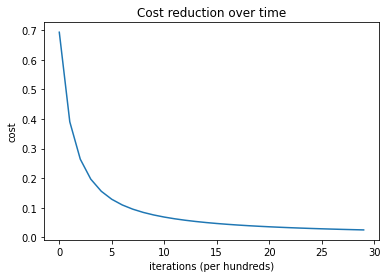

In [40]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression()

In [43]:
clf.fit(X_tr_arr, y_tr_arr)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [44]:
print (clf.intercept_, clf.coef_)

[5.99448734] [[-0.40605578  0.87060474 -2.17321526 -0.92450397]]


In [45]:
clf.predict(X_ts_arr)

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0])

In [46]:
import sklearn.metrics as mt

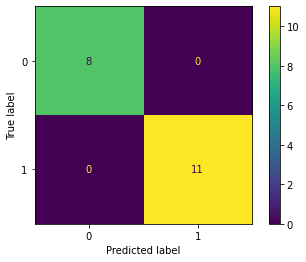

In [48]:
mt.plot_confusion_matrix(clf,X_ts_arr,y_ts_arr)

In [49]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [50]:
import sklearn.preprocessing as pp

In [51]:
lb = pp.LabelBinarizer()

In [52]:
new_target = lb.fit_transform(df.target)

In [53]:
new_target

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [54]:
X = df[[c for c in df.columns if c!='target']].values

In [55]:
y = new_target

In [56]:
scaler = StandardScaler()
inp_df = scaler.fit_transform(X)
#
X_tr_arr, X_ts_arr, y_tr_arr, y_ts_arr = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.001,no_iterations=30000)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
#print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
#print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 4
Cost after 0 iteration is 2.079442
Cost after 100 iteration is 1.840185
Cost after 200 iteration is 1.771995
Cost after 300 iteration is 1.717809
Cost after 400 iteration is 1.668932
Cost after 500 iteration is 1.624335
Cost after 600 iteration is 1.583557
Cost after 700 iteration is 1.546216
Cost after 800 iteration is 1.511965
Cost after 900 iteration is 1.480493
Cost after 1000 iteration is 1.451520
Cost after 1100 iteration is 1.424793
Cost after 1200 iteration is 1.400089
Cost after 1300 iteration is 1.377209
Cost after 1400 iteration is 1.355973
Cost after 1500 iteration is 1.336225
Cost after 1600 iteration is 1.317823
Cost after 1700 iteration is 1.300642
Cost after 1800 iteration is 1.284569
Cost after 1900 iteration is 1.269506
Cost after 2000 iteration is 1.255363
Cost after 2100 iteration is 1.242060
Cost after 2200 iteration is 1.229527
Cost after 2300 iteration is 1.217698
Cost after 2400 iteration is 1.206517
Cost after 2500 iteration is 1.195931
Cos

Cost after 21300 iteration is 0.818499
Cost after 21400 iteration is 0.817898
Cost after 21500 iteration is 0.817301
Cost after 21600 iteration is 0.816707
Cost after 21700 iteration is 0.816116
Cost after 21800 iteration is 0.815528
Cost after 21900 iteration is 0.814944
Cost after 22000 iteration is 0.814363
Cost after 22100 iteration is 0.813785
Cost after 22200 iteration is 0.813210
Cost after 22300 iteration is 0.812638
Cost after 22400 iteration is 0.812069
Cost after 22500 iteration is 0.811503
Cost after 22600 iteration is 0.810940
Cost after 22700 iteration is 0.810381
Cost after 22800 iteration is 0.809824
Cost after 22900 iteration is 0.809270
Cost after 23000 iteration is 0.808719
Cost after 23100 iteration is 0.808171
Cost after 23200 iteration is 0.807626
Cost after 23300 iteration is 0.807083
Cost after 23400 iteration is 0.806543
Cost after 23500 iteration is 0.806006
Cost after 23600 iteration is 0.805472
Cost after 23700 iteration is 0.804941
Cost after 23800 iteratio

In [59]:
final_test_pred.T

array([[9.48492576e-03, 4.73524128e-01, 3.28358533e-01],
       [9.75911113e-01, 1.38829342e-01, 2.16053904e-04],
       [5.03154360e-05, 6.85507847e-01, 9.62794589e-01],
       [1.19556408e-02, 3.83070327e-01, 3.41698169e-01],
       [8.56543164e-03, 5.11727569e-01, 2.43532285e-01],
       [9.66014334e-01, 1.64374839e-01, 4.10827290e-04],
       [7.52858894e-02, 3.08610167e-01, 1.05026450e-01],
       [3.11624452e-03, 3.48614584e-01, 5.60490919e-01],
       [4.97095190e-03, 5.80285914e-01, 4.87685818e-01],
       [3.78361362e-02, 4.07679324e-01, 1.50906163e-01],
       [4.00472556e-03, 3.32635250e-01, 5.49328367e-01],
       [9.54020849e-01, 2.19007986e-01, 7.77052351e-04],
       [9.84245803e-01, 1.60061940e-01, 1.63529005e-04],
       [9.52723687e-01, 2.12558953e-01, 7.30711255e-04],
       [9.79537535e-01, 1.10149470e-01, 3.18911657e-04],
       [1.40928036e-02, 3.13240587e-01, 2.67244946e-01],
       [5.82044333e-04, 4.12140076e-01, 8.87390945e-01],
       [2.92274677e-02, 4.56636

In [60]:
final_test_pred.T.argmax(axis=1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [61]:
y_ts_arr.argmax(axis=1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [63]:
mt.confusion_matrix(final_test_pred.T.argmax(axis=1),y_ts_arr.argmax(axis=1))

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

<AxesSubplot:>

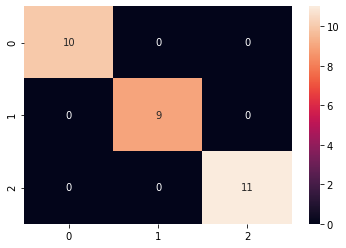

In [64]:
sns.heatmap(mt.confusion_matrix(final_test_pred.T.argmax(axis=1),y_ts_arr.argmax(axis=1)),annot=True)